# Wørdle på dansk

En undersøgelse af hvilke bogstaver der er mest forekomne i det danske sprog - og ikke mindst i 5 bogstavs ord.
Ligeledes gives et bud på de to første optimale gæt, samt sandsynlighede for antal rigtige bogstaver efter at disse to gæt er brugt.


In [1]:
import itertools
from collections import Counter, OrderedDict

import pandas as pd
from tqdm.notebook import tqdm, trange

### Henter alle danske ord fra retskrivningsordbogen
Data er hentet fra Application Storage `data_meta` fra https://roplus.dk/#ordbog/ og skal således forbehandles

In [58]:
with open("./data/ord.txt") as f:
    lines = f.readlines()
lines = lines[0].split("\\n")[4:]

In [59]:
ord = [l.split("\\")[0].lstrip("0123456789-") for l in lines]
ord = list(OrderedDict.fromkeys(ord))
print(f"Antal ord i retskrivningsordbogen {len(ord):,}")

Antal ord i retskrivningsordbogen 63,860


### Tæl bogstaver
I alt 63860 ord i ordbogen. Lad os tælle nogle bogstaver. Alle ord lægges i en DataFrame så de er nemmere at håndtere og optælle. Der oprettes en kolonne for hvert bogstav og der optælles hvor mange gange dette bogstav forekommer i ordet.

In [60]:
def letter_counts(s: str) -> dict:
    counts = Counter([l for l in s.lower()])
    return counts

In [61]:
%%time
df = pd.DataFrame(ord, columns=["ord"])

# Længde af ord samt optælling af bogstaver
df["len"] = df["ord"].str.len()
df["count"] = df["ord"].apply(letter_counts)

# Split dict til kolonner
df = pd.concat([df.drop(["count"], axis=1), df["count"].apply(pd.Series)], axis=1)

# Sorter bogstavskolonnerne
df = df[["ord", "len"] + [i for i in df.columns[2:].sort_values() if i.isalpha()]]

CPU times: user 5.77 s, sys: 137 ms, total: 5.91 s
Wall time: 5.93 s


In [62]:
df.sample(5)

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
14215,flæng,5,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
57801,tvært,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
42241,professorat,11,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46929,selvransagende,14,2.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63150,zinkliniment,12,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
c = dict()
for s in df[df["len"] == 5]["ord"]:
    p = s.find("r")
    c[p] = c.get(p, 0) + 1

c

{-1: 2459, 3: 219, 2: 380, 4: 264, 1: 277, 0: 160}

In [8]:
# Fordeling af længden af ord på dansk
df["len"].describe()

count    63860.000000
mean         9.160883
std          3.158232
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: len, dtype: float64

Et gennemsnitligt dansk ord i retskrivbningsordbogen er består af 9 bogstaver

In [9]:
# De fem længste ord i retskrivningsordbogen
df.loc[df["len"].nlargest(5).index, :]

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
50164,social- og sundhedsforvaltning,30,2.0,NaN,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45840,Saint Vincent og Grenadinerne,29,2.0,NaN,1.0,1.0,4.0,NaN,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50163,social- og sundhedsassistent,28,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59993,undervisningsdifferentiering,28,NaN,NaN,NaN,2.0,4.0,2.0,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17484,førstegenerationsindvandrer,27,2.0,NaN,NaN,2.0,4.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [63]:
df.to_pickle("ord.pkl")

### 5 bogstavs ord
Lad os se på bogstavsfordelingen i 5 bogstavs ord

In [2]:
df = pd.read_pickle("ord.pkl")

In [3]:
print(f'Antal ord på 5 bogstaver {df[df["len"] == 5].shape[0]:,}')

Antal ord på 5 bogstaver 3,759


In [4]:
# Et par eksempler:
df[df["len"] == 5].sample(5)

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
1551,altid,5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23077,hører,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
49072,skønt,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
62795,væsel,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
54799,tegne,5,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Af de ca 64.000 ord i retskrivningsordbogen er der 3759 ord (~6%) med 5 bogstaver. Lad os se på en frekvensoptælling af bogstaverne. Selv om et bogstav forekommer to gange i et ord så optælles det kun som én gang forekomnst.

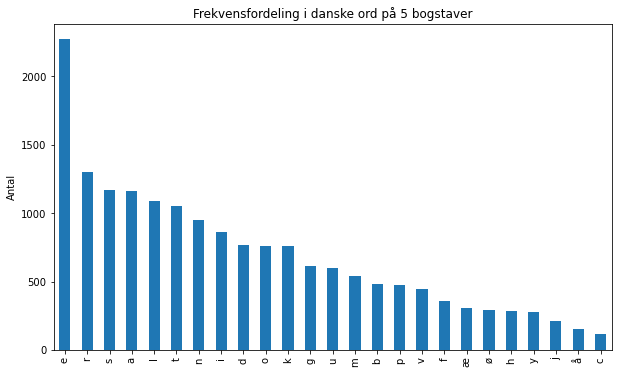

In [5]:
df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:25].plot.bar(
    figsize=(10, 6),
    title="Frekvensfordeling i danske ord på 5 bogstaver",
    ylabel="Antal",
);

In [6]:
# Frekvens i %
df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:5] / df[
    df["len"] == 5
].shape[0]

e    0.604416
r    0.346635
s    0.310987
a    0.310189
l    0.290503
dtype: float64

Dvs. de 10 mest almindelige bogstaver er e, r, s, a, l, t, n, i, d og o. E forekommer i 60% af alle 5 bogstavsord.

Lad os se på fordelingen i alle andre ord som ikke har 5 bogstaver

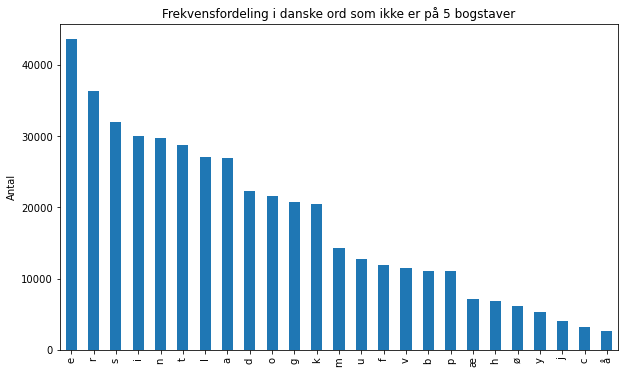

In [7]:
df[df["len"] != 5].iloc[:, 2:].count().sort_values(ascending=False)[:25].plot.bar(
    figsize=(10, 6),
    title="Frekvensfordeling i danske ord som ikke er på 5 bogstaver",
    ylabel="Antal",
);

Interessant, Samme top10 men et lidt andet billede. Vi fortsætter med fordelingen med 5 bogstavsord

Her er en funktion der returnerer alle 5 bogstavsord fra retskrivningsordbogen der indeholder de angivne bogstaver.

In [8]:
def containsAll(str: str, set: str) -> bool:
    return 0 not in [c in str for c in set]

#def containsAny(str: str, set: str) -> bool:
    

In [9]:
[c in "c" for c in "cider"]

[True, False, False, False, False]

In [10]:
def check_letters(s: str, len: int = 5) -> str:
    # print(s)
    return list(
        df[(df["len"] == len) & (df["ord"].apply(lambda x: containsAll(x, s)))]["ord"]
    )

In [14]:
test = "tiba"

l = check_letters(test)

print(l)

['batik', 'bisat', 'habit']


In [15]:
top15 = list(
    df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:15].index
)

not_test = [i for i in top15 if i not in test]

[i for i in l if all([not j in i for j in not_test])]


['habit']

In [13]:
all([True, True])

True

### Find mulige ord med top 15 bogstaver

In [82]:
top15 = list(
    df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:15].index
)

In [83]:
top15

['e', 'r', 's', 'a', 'l', 't', 'n', 'i', 'd', 'o', 'k', 'g', 'u', 'm', 'b']

In [102]:
%%time
pairs = []
for l in tqdm([i1 for i1 in itertools.combinations(top15, 5)]):
    rest = list(set(top15) - set(l))
    for m in [i2 for i2 in itertools.combinations(rest, 5)]:
        last = list(set(rest) - set(m))
        pairs.append(sorted(["".join(l), "".join(m), "".join(last)]))

  0%|          | 0/3003 [00:00<?, ?it/s]

CPU times: user 1.51 s, sys: 80.5 ms, total: 1.59 s
Wall time: 1.59 s


In [17]:
pairs.sort()
pairs = [i for i, _ in itertools.groupby(pairs)]

NameError: name 'pairs' is not defined

In [16]:
import random


def scrambled(orig):
    dest = orig[:]
    random.shuffle(dest)
    return dest


#pairs = scrambled(pairs)

In [110]:
len(pairs)

442274

In [111]:
%%time

t = 0

# Print possible words
for letters in tqdm(pairs):
    if (
        (ord1 := check_letters(letters[0]))
        and (ord2 := check_letters(letters[1]))
        and (ord3 := check_letters(letters[2]))
    ):
        print(f"Ord 1: {ord1}, Ord 2: {ord2}, , Ord 3: {ord3}")
        t += 1
        if t > 10:
            break

  0%|          | 0/442274 [00:00<?, ?it/s]

Ord 1: ['album'], Ord 2: ['godte'], , Ord 3: ['skrin']
Ord 1: ['beglo', 'globe'], Ord 2: ['musik'], , Ord 3: ['randt']
Ord 1: ['brint'], Ord 2: ['kagle', 'klage'], , Ord 3: ['modus']
Ord 1: ['rumba', 'umbra'], Ord 2: ['longe', 'nogle'], , Ord 3: ['skidt']
Ord 1: ['marin'], Ord 2: ['bedst'], , Ord 3: ['uklog']
Ord 1: ['latin', 'nital'], Ord 2: ['ombud'], , Ord 3: ['skreg']
Ord 1: ['agern', 'anger', 'angre', 'range'], Ord 2: ['isbod'], , Ord 3: ['mulkt']
Ord 1: ['bragt'], Ord 2: ['medio'], , Ord 3: ['kluns']
Ord 1: ['gliom'], Ord 2: ['brudt'], , Ord 3: ['knase', 'sanke']
Ord 1: ['nobel'], Ord 2: ['sigma'], , Ord 3: ['krudt']
Ord 1: ['kadre'], Ord 2: ['bonus'], , Ord 3: ['glimt']
CPU times: user 54.6 s, sys: 413 ms, total: 55 s
Wall time: 55 s


In [144]:
if [1]:
    print("yes")

yes


In [31]:
len(pairs)

528542

In [18]:
for i in itertools.combinations("pairss", 5):
    print(i)

('p', 'a', 'i', 'r', 's')
('p', 'a', 'i', 'r', 's')
('p', 'a', 'i', 's', 's')
('p', 'a', 'r', 's', 's')
('p', 'i', 'r', 's', 's')
('a', 'i', 'r', 's', 's')


In [84]:
top10 = list(
    df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:10].index
)
print(top10)

['e', 'r', 's', 'a', 'l', 't', 'n', 'i', 'd', 'o']


In [85]:
%%time
# Generate all possible 5 letter pairs
pairs = []
for l in [i for i in itertools.combinations(top10, 5)]:
    pairs.append(["".join(l), "".join(list(set(top10) - set(l)))])

# Print possible words
for letters in pairs:
    if ((ord1 := check_letters(letters[0])) != []) and (
        (ord2 := check_letters(letters[1])) != []
    ):
        print(f"Ord 1: {ord1}, Ord 2: {ord2}")

ersal
otdin
ersat
odinl
ersan
otdil
ersai
ersad
ersao
erslt
ersln
ersli
otadn
ersld
erslo
erstn
oadil
ersti
oadnl
erstd
oainl
ersto
adinl
Ord 1: ['roset'], Ord 2: ['iland']
ersni
ersnd
ersno
tadil
Ord 1: ['rosen'], Ord 2: ['altid']
ersid
otanl
Ord 1: ['ridse'], Ord 2: ['talon', 'tonal']
ersio
ersdo
eralt
osdin
eraln
erali
erald
ostin
eralo
eratn
osdil
Ord 1: ['trane'], Ord 2: ['solid']
erati
eratd
erato
erani
erand
ostil
erano
eraid
ostnl
eraio
erado
erltn
erlti
osadn
erltd
erlto
erlni
ostad
erlnd
erlno
stadi
erlid
ostan
erlio
erldo
ertni
osadl
Ord 1: ['inert', 'trine'], Ord 2: ['saldo']
ertnd
osail
ertno
sadil
ertid
ertio
sadnl
ertdo
sainl
ernid
ostal
Ord 1: ['diner', 'inder', 'indre', 'rinde'], Ord 2: ['salto', 'stola']
ernio
erndo
stail
erido
esalt
odinr
esaln
otdir
esali
esald
otinr
Ord 1: ['sadel', 'sadle'], Ord 2: ['intro']
esalo
esatn
odirl
esati
odnrl
esatd
oinrl
esato
esani
esand
otirl
Ord 1: ['danse', 'sande', 'sedan'], Ord 2: ['triol']
esano
esaid
esaio
esado
esltn
eslti
oad

Et god bud på de to første ord kunne være "delta" og "rosin". Lad os undersøge hvor mange bogstaver vi vil finde hvis de to ord er de første to gæt. Alle lovlige kombinationer ovenfor vil give det samme resultat i ndenstående:

In [87]:
def count_overlap(s1: str, s2: str) -> int:
    return len(set(s1) & set(s2))

In [91]:
ord1, ord2, ord3 = "storm", "kline", "bagud"

df["gæt 1"] = df.apply(lambda x: count_overlap(x["ord"], ord1), axis=1)
df["gæt 2"] = df.apply(lambda x: count_overlap(x["ord"], ord2), axis=1)
df["gæt 3"] = df.apply(lambda x: count_overlap(x["ord"], ord3), axis=1)

df["top15"] = df["gæt 1"] + df["gæt 2"] + df["gæt 3"]

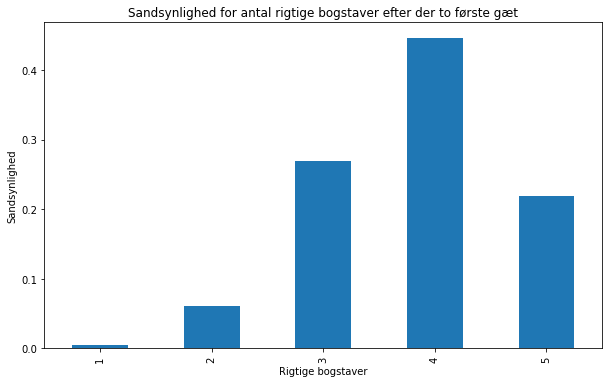

In [92]:
df[df["len"] == 5]["top15"].value_counts(normalize=True).sort_index().plot.bar(
    figsize=(10, 6),
    title="Sandsynlighed for antal rigtige bogstaver efter der to første gæt",
    xlabel="Rigtige bogstaver",
    ylabel="Sandsynlighed",
);

In [98]:
df[df["len"] == 5]["top15"].value_counts(normalize=True).sort_index()[2:].sum()

0.933758978451716

In [155]:
df

,ord,len,a,b,c,d,e,f,g,h,...,å,æ,é,ø,ü,sorted,gæt 1,gæt 2,gæt 3,top15
0,A3-format,9,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3Aafmort,2,2,1,5
1,A4-format,9,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4Aafmort,2,2,1,5
2,A5-format,9,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-5Aafmort,2,2,1,5
3,A-aktie,7,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-Aaeikt,3,1,0,4
4,ab,2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ab,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63855,årvågen,7,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,egnrvåå,1,2,1,4
63856,Årøsund,7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,dnrsuÅø,1,3,0,4
63857,ås,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,så,0,1,0,1
63858,åsted,5,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,destå,3,1,0,4


### Konklusion
Hvis de to første gæt er "delta" og "rosin" vil vi med ~72% sandsynlighed have 3 eller flere rigtige bogstaver